In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
i_s = 28
com = transforms.Compose([transforms.ToTensor()])

In [ ]:
train_dset = dsets.FashionMNIST(root = './data',train = True,download = True,transform = com)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
val_dset = dsets.FashionMNIST(root = './data',train = False,download = True,transform = com )

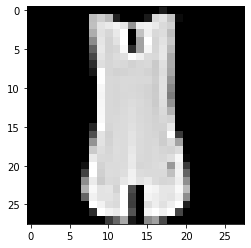

In [ ]:
plt.imshow(train_dset[4][0].numpy().reshape(i_s,i_s),cmap = 'gray')

In [ ]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5,stride = 1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=3, stride=1)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 5 * 5, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


In [ ]:
model = CNN(out_1 = 16,out_2= 32)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=val_dset, batch_size=5000)

In [ ]:
# Train the model

n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(val_dset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(i_s, i_s), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

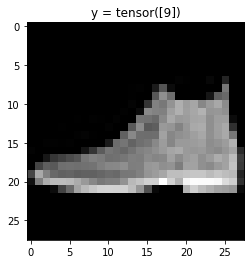

yhat : tensor([9])


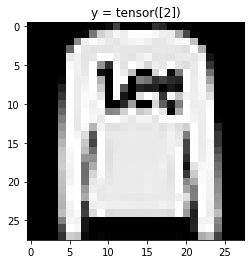

yhat : tensor([2])


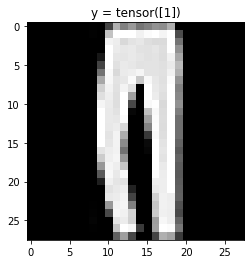

yhat : tensor([1])


In [ ]:

count = 0
validation_loader2 = torch.utils.data.DataLoader(dataset=val_dset, batch_size=1)

for  x,y in validation_loader2:
  a = model(x)
  _, yhat = torch.max(a, 1)
  show_data((x,y))
  plt.show()
  print("yhat :",yhat)
  count +=1
  if count >= 3:
     break


yhat =tensor([9])                             yhat =tensor([2])                             yhat =tensor([1])                             

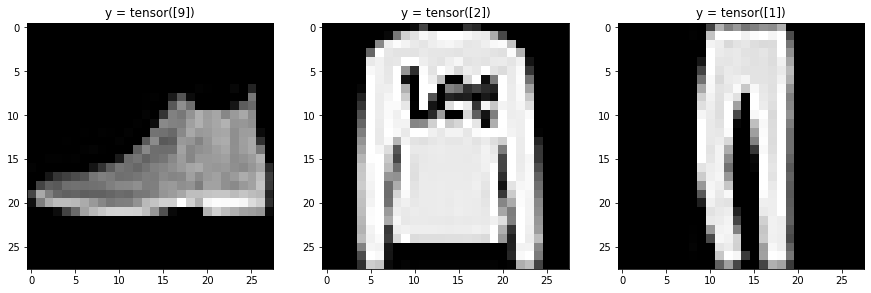

In [ ]:
count = 0
validation_loader2 = torch.utils.data.DataLoader(dataset=val_dset, batch_size=1)
fig,axs = plt.subplots(1,3,figsize =(15,15))
fig.subplots_adjust(hspace=1)
for  ax,(x,y) in zip(axs,validation_loader2):
  a = model(x)
  _, yhat = torch.max(a, 1)
  ax.imshow(x.numpy().reshape(i_s,i_s), cmap='gray')
  ax.set_title('y = '+ str(y))
  print('yhat ='+str(yhat),"                            ",end = "")
  count +=1
  if count >= 3:
    break


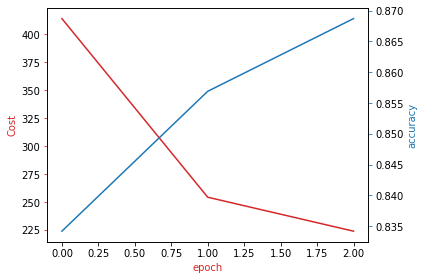

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [ ]:
print(accuracy_list)

[0.8342, 0.8569, 0.8687]
